In [1]:
from github import Github
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
g = Github('username','password')
today = pd.to_datetime('today')

In [2]:
df_clones = pd.DataFrame(\
    index=pd.date_range(start=today-pd.to_timedelta('14d'),end=today).date)
df_clones_unique = pd.DataFrame(\
    index=pd.date_range(start=today-pd.to_timedelta('14d'),end=today).date)
df_views = pd.DataFrame(\
    index=pd.date_range(start=today-pd.to_timedelta('14d'),end=today).date)
df_views_unique = pd.DataFrame(\
    index=pd.date_range(start=today-pd.to_timedelta('14d'),end=today).date)

In [3]:
%%time
for repo_path in tqdm(g.get_user().get_repos(),total=22):
    views = g.get_repo(repo_path.full_name).get_views_traffic()['views']
    clones = g.get_repo(repo_path.full_name).get_clones_traffic()['clones']
    for d in clones:
        repo_name = repo_path.full_name.split('/')[1]
        if repo_name not in df_clones.columns:
            df_clones[repo_name]=0
            df_clones_unique[repo_name]=0
        else:
            df_clones.loc[d.timestamp.date(),repo_name]=d.count
            df_clones_unique.loc[d.timestamp.date(),repo_name]=d.count
    for d in views:
        repo_name = repo_path.full_name.split('/')[1]
        if repo_name not in df_views.columns:
            df_views[repo_name]=0
            df_views_unique[repo_name]=0
        else:
            df_views.loc[d.timestamp.date(),repo_name]=d.count
            df_views_unique.loc[d.timestamp.date(),repo_name]=d.uniques

23it [00:27,  1.18s/it]CPU times: user 395 ms, sys: 58.1 ms, total: 454 ms
Wall time: 27.1 s



In [4]:
df_views.index.set_names('date',inplace=True)
df_views_unique.index.set_names('date',inplace=True)

df_clones.index.set_names('date',inplace=True)
df_clones_unique.index.set_names('date',inplace=True)

In [5]:
d_clones=pd.concat([df_clones,df_clones_unique],axis=0,keys=['total','unique'])
d_clones.index = d_clones.index.set_names(['v_cat','date'])
#pd.concat([d_views,df_clones],axis=0,keys=['views','clones'])
#d_clones.groupby(['date','v_cat']).sum()

In [6]:
d_views=pd.concat([df_views,df_views_unique],axis=0,keys=['total','unique'])
d_views.index = d_views.index.set_names(['v_cat','date'])
#pd.concat([d_views,df_clones],axis=0,keys=['views','clones'])
#d_views.groupby(['date','v_cat']).sum()

In [7]:
d=pd.concat([d_views,d_clones],axis=0,keys=['views','clones'])
d.index = d.index.set_names(['type','cat','date'])

In [8]:
df = d.groupby(['date','type','cat']).sum()

In [9]:
df.to_csv(f'{today.strftime("%Y%m%d")}_github_traffic.csv')

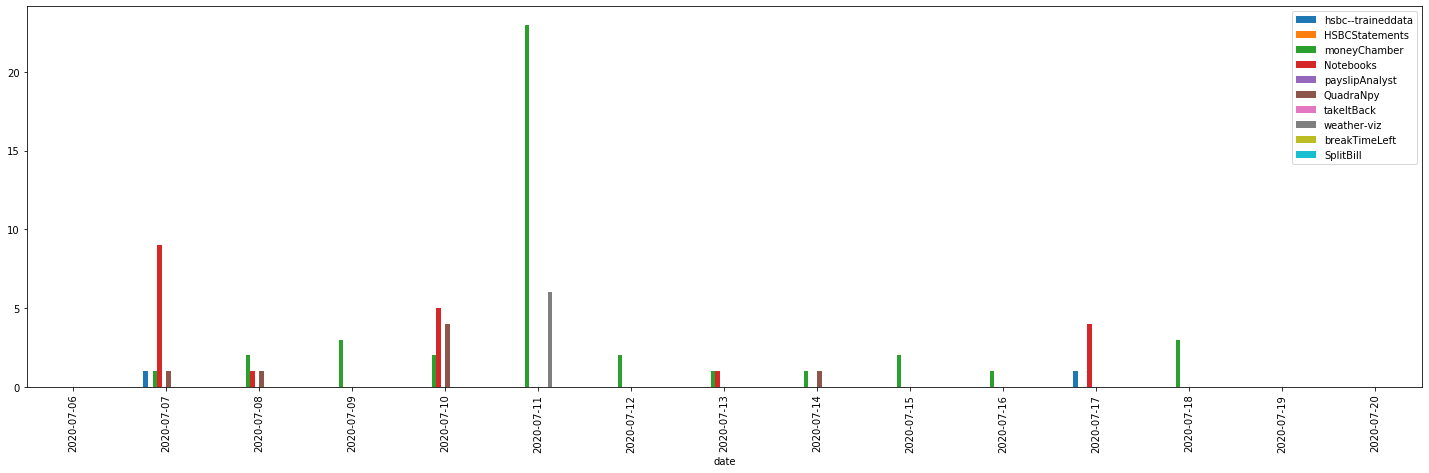

In [10]:
df.xs(('views','total'),level=(1,2)).plot(kind='bar',figsize=(25,7))